In [3]:
from image_data_quality.image_dataset import Imagelab
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob

In [4]:
# ! pip install cifar2png
# ! cifar2png cifar10 ./cifar10png --name-with-batch-index

In [5]:
def display_results(files, topk=5):
    print(f)
    for i, f in enumerate(files[:topk]):
        display(Image(os.path.join(f)))

In [6]:
pd.set_option('display.max_rows', 20)

In [7]:
dataset_path = "/Users/sanjana/Downloads/256_ObjectCategories/*/"

In [8]:
imagelab = Imagelab(dataset_path)
print(f"Number of images: {str(len(imagelab.image_files))}")

Number of images: 30607


In [9]:
issues = imagelab.evaluate()
imagelab.aggregate()
summary, results_df = imagelab.summary()

Checking for DarkImages, NearDuplicates, Blurred, AspectRatio, Entropy, LightImages, Grayscale, Duplicated


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30607/30607 [09:32<00:00, 53.42it/s]

Color spaces in the  dataset
{'RGB': 30185, 'L': 422}

Issue Summary
                Issues  Percent of Data  Issue Intensity
DarkImages        1248             4.08         0.242518
NearDuplicates    1154             3.77         0.224252
AspectRatio       1063             3.47         0.206568
Blurred            828             2.71         0.160902
Grayscale          443             1.45         0.086086
LightImages        263             0.86         0.051108
Entropy            116             0.38         0.022542
Duplicated          31             0.10         0.006024



# Dark Images

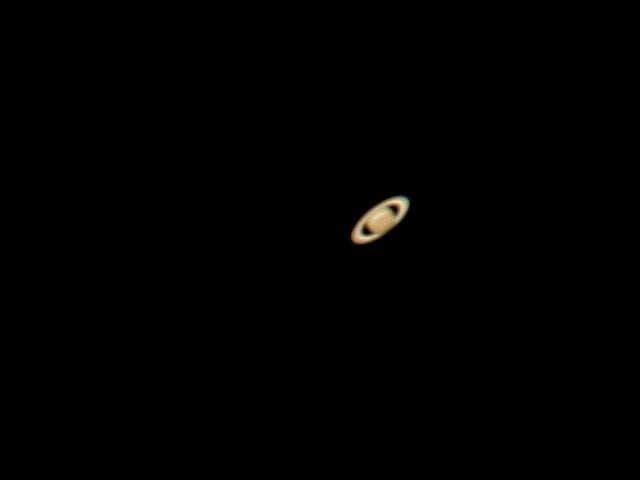

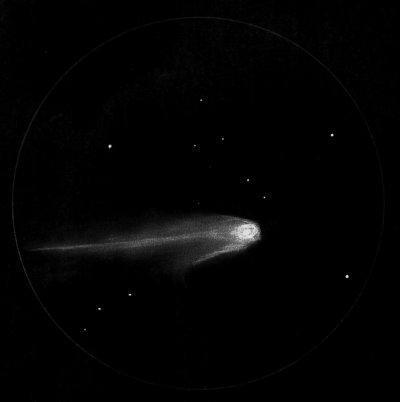

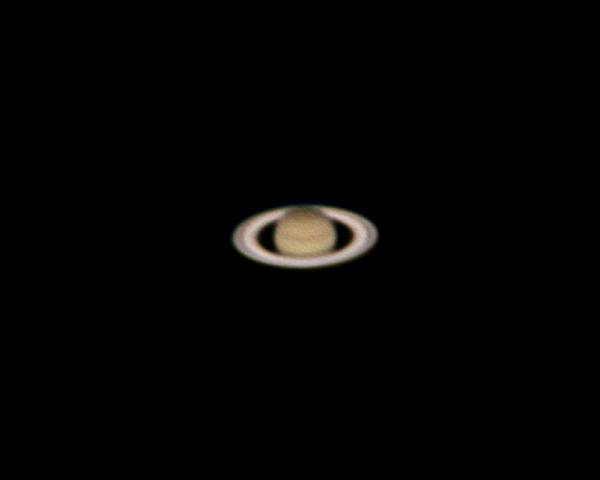

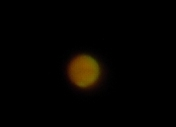

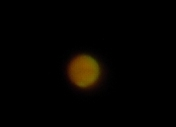

In [10]:
sorted_df = results_df.sort_values(by=[f'DarkImages score'])
files =list(sorted_df[sorted_df[f'DarkImages bool'] == True]['image_name'])
display_results(files)

## Grayscale Images

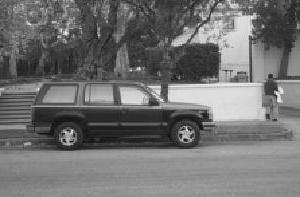

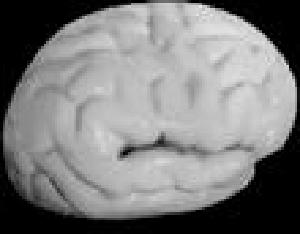

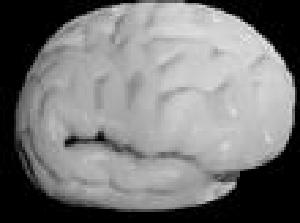

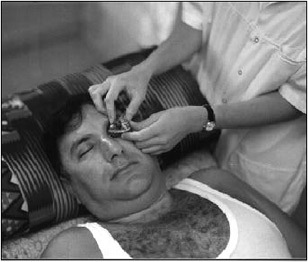

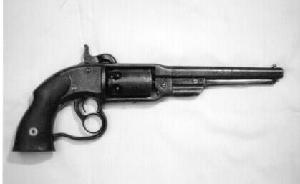

In [11]:
sorted_df = results_df.sort_values(by=[f'Grayscale score'])
files =list(sorted_df[sorted_df[f'Grayscale bool'] == True]['image_name'])
display_results(files)

## Blurred images

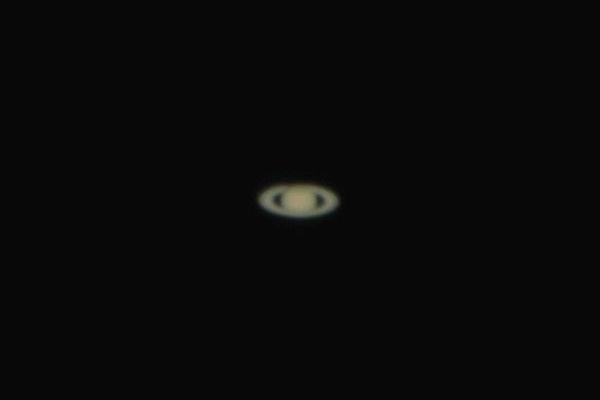

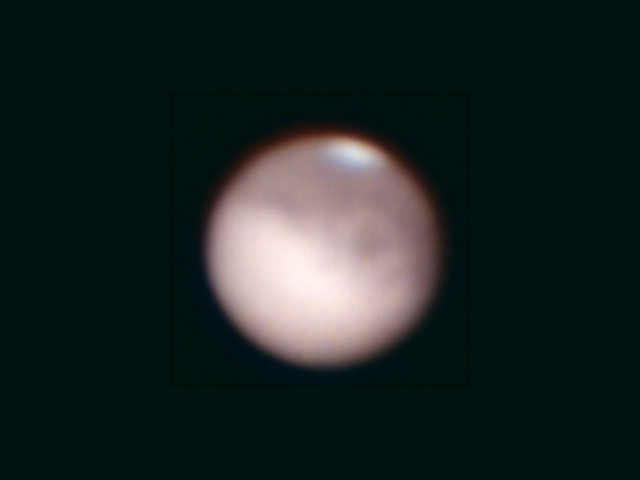

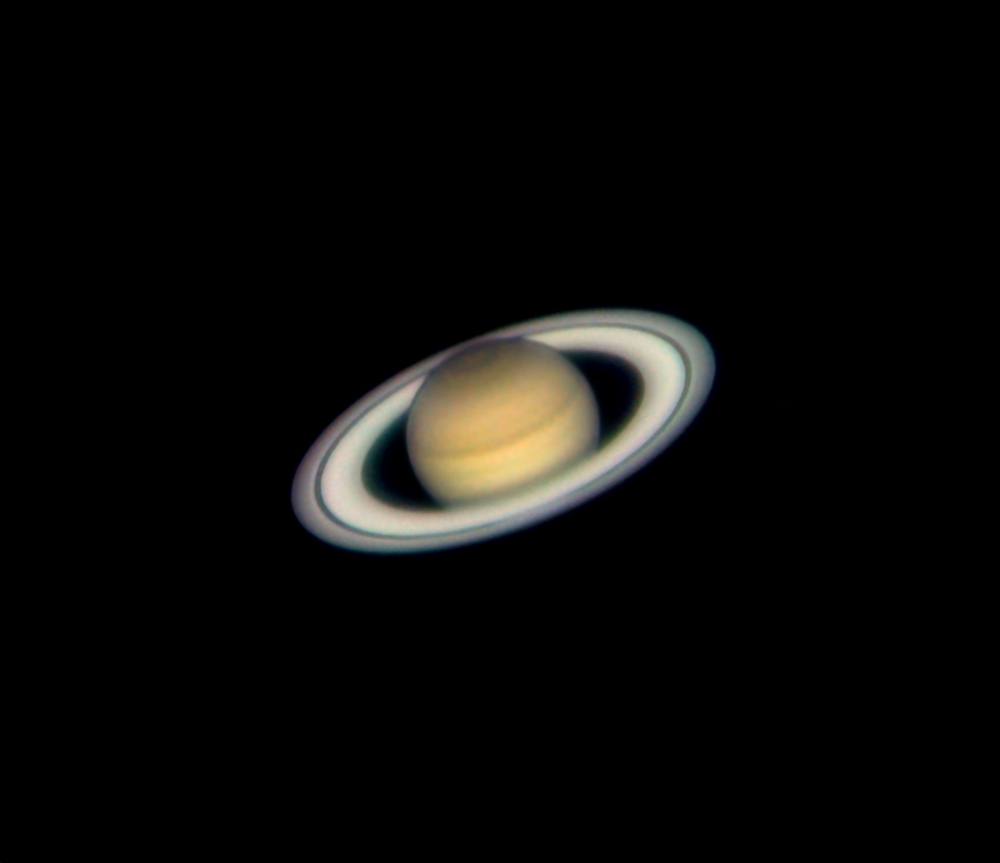

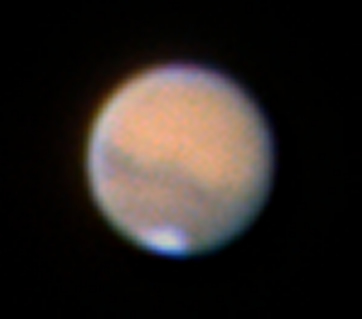

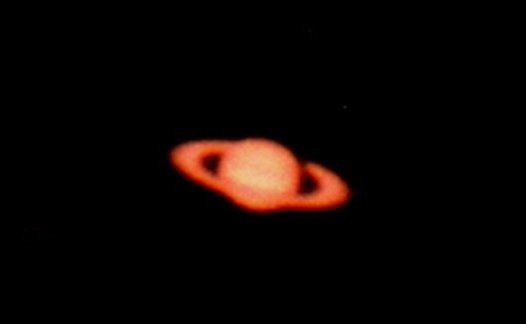

In [12]:
sorted_df = results_df.sort_values(by=[f'Blurred score'])
files =list(sorted_df[sorted_df[f'Blurred bool'] == True]['image_name'])
display_results(files)

## Skewed aspect ratio

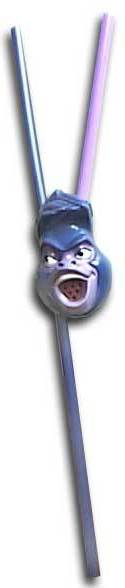

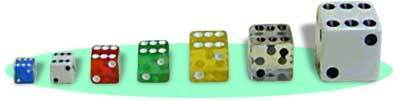

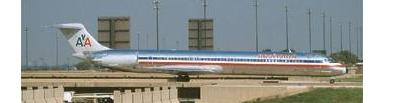

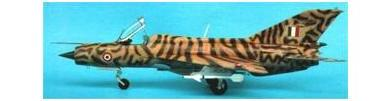

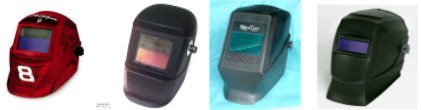

In [13]:
sorted_df = results_df.sort_values(by=[f'AspectRatio score'])
files =list(sorted_df[sorted_df[f'AspectRatio bool'] == True]['image_name'])
display_results(files)

## Light Images

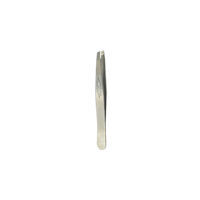

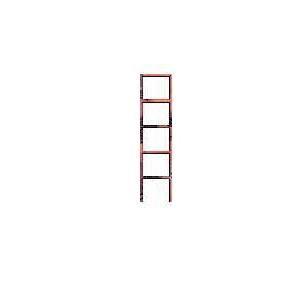

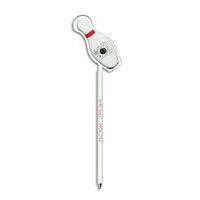

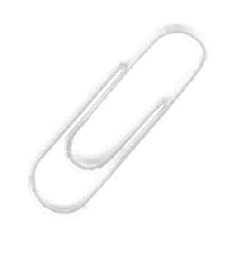

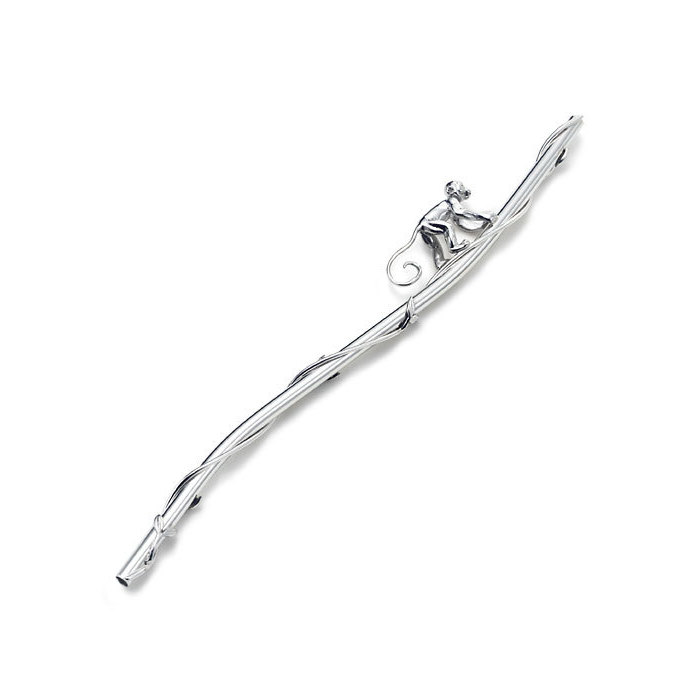

In [14]:
sorted_df = results_df.sort_values(by=[f'LightImages score'])
files =list(sorted_df[sorted_df[f'LightImages bool'] == True]['image_name'])
display_results(files)

## Low Entropy

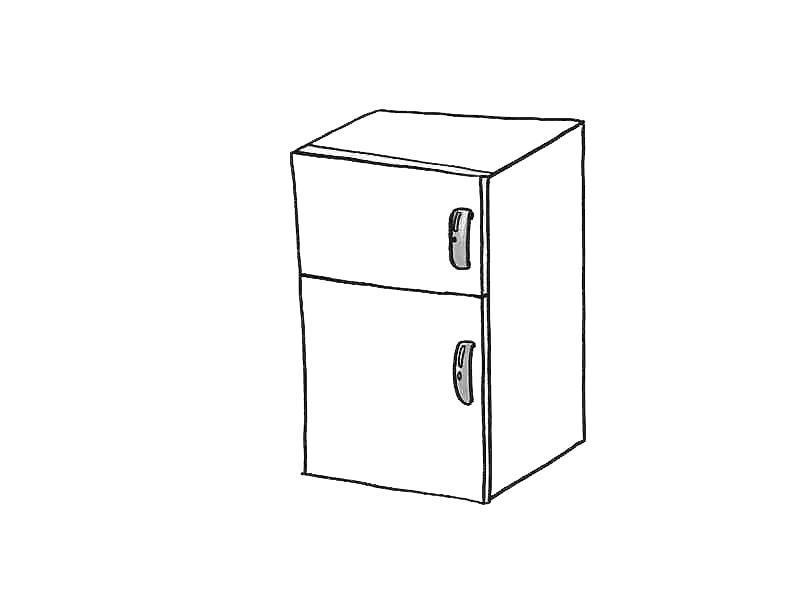

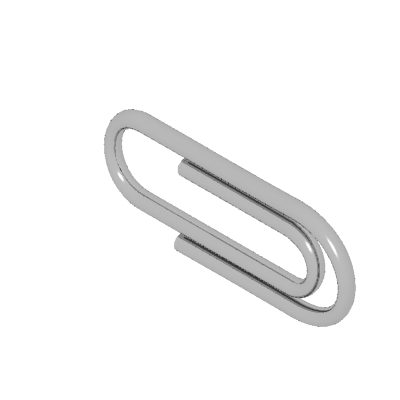

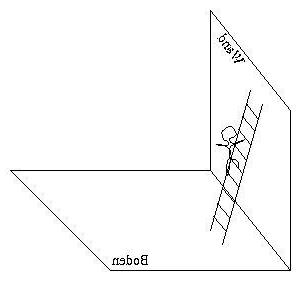

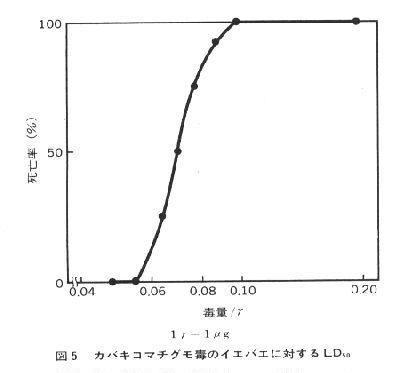

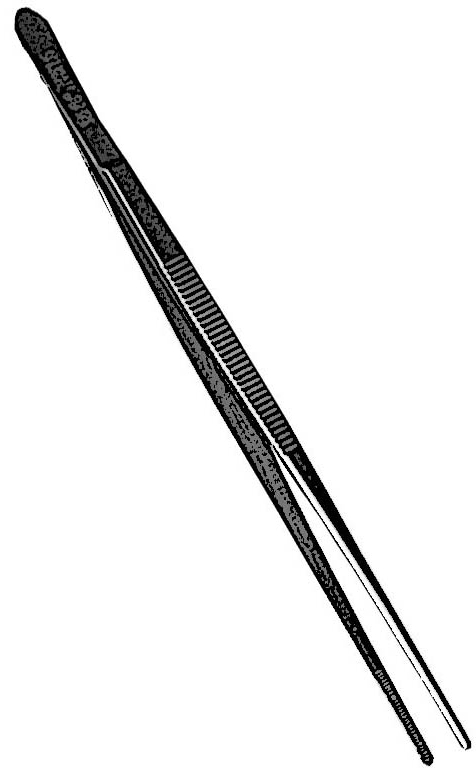

In [15]:
sorted_df = results_df.sort_values(by=[f'Entropy score'])
files =list(sorted_df[sorted_df[f'Entropy bool'] == True]['image_name'])
display_results(files)

## Near Duplicates

0


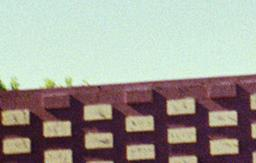

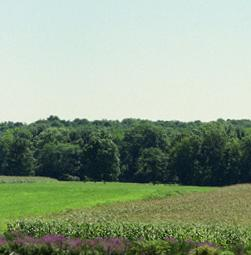

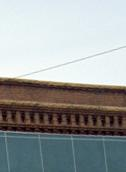

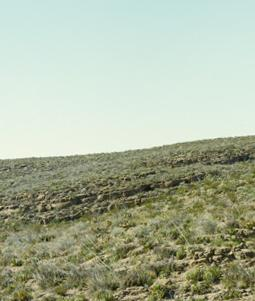

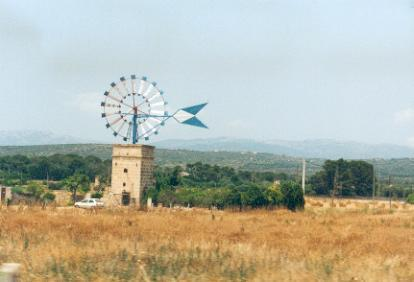

1


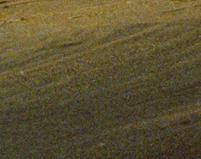

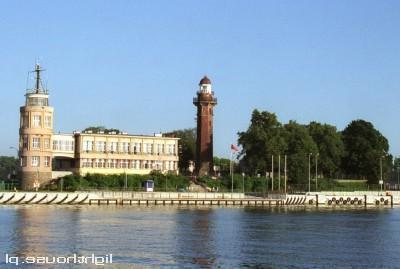

2


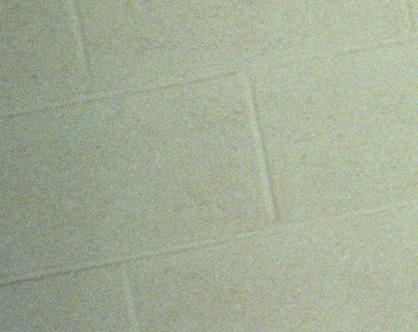

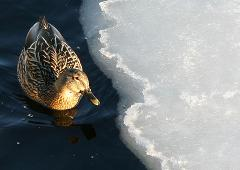

3


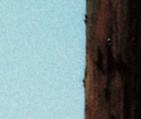

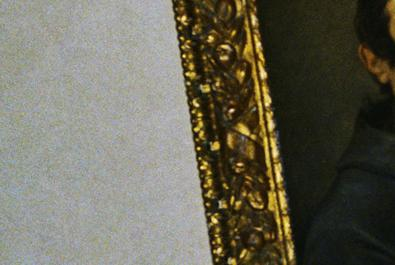

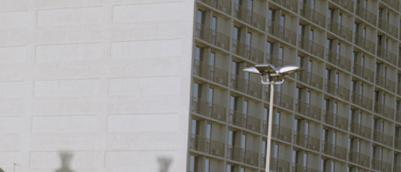

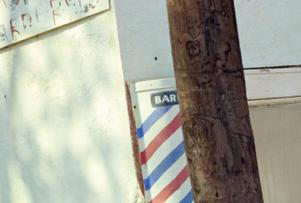

4


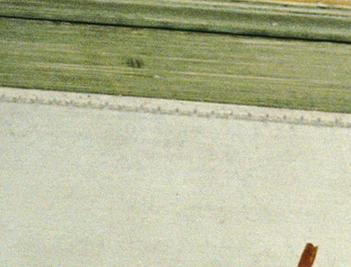

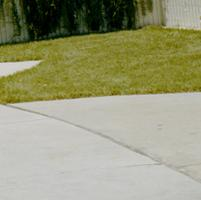

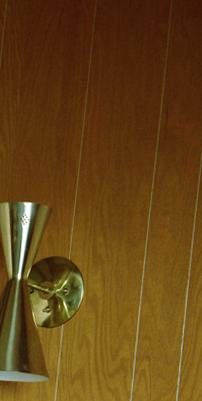

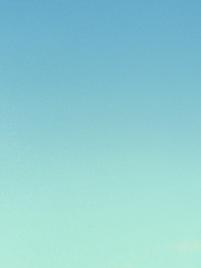

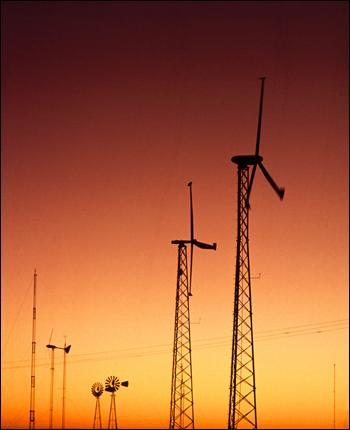

In [20]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'NearDuplicates':
        duplicate_sets = manager.get_duplicated_sets()
for i, s in enumerate(duplicate_sets):
    print(i)
    display_results(s)

## Duplicated

0


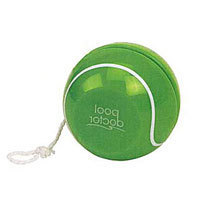

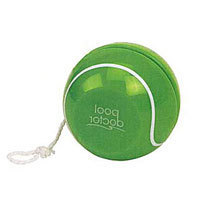

1


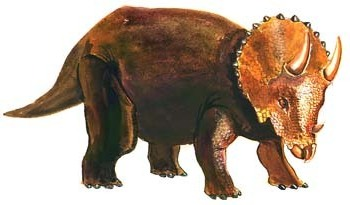

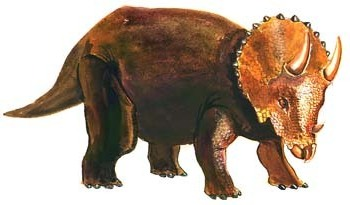

2


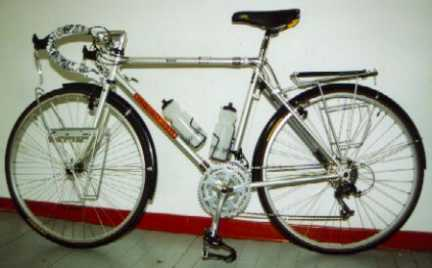

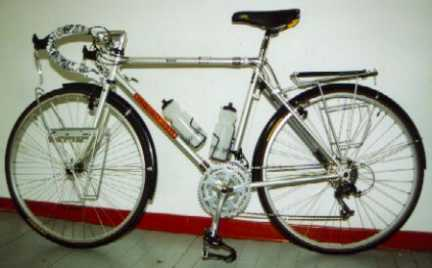

3


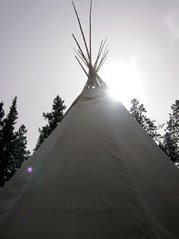

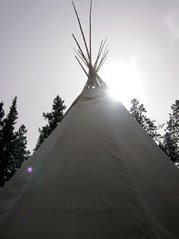

4


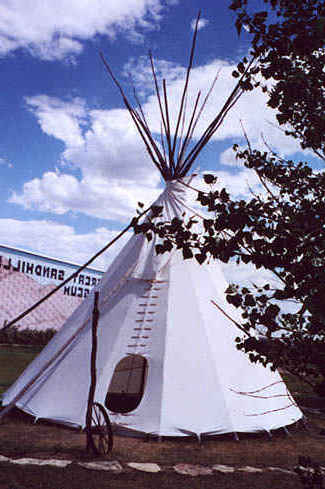

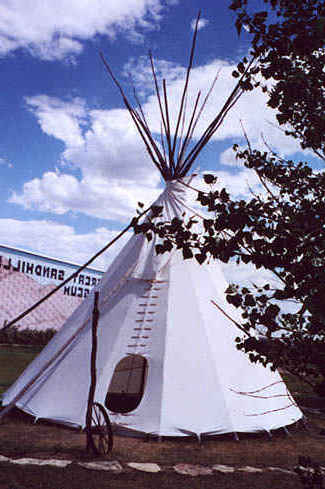

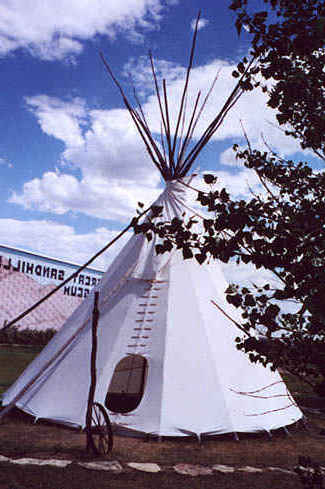

In [21]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'Duplicated':
        duplicate_sets = manager.get_duplicated_sets()
for i, s in enumerate(duplicate_sets):
    print(i)
    display_results(s)